In [1]:
import numpy as np
from scipy import stats

def tolerance_interval(data, alpha, P, side='two'):
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    
    # Calculate degrees of freedom
    df = n - 1
    
    # Calculate z-score for the desired proportion
    if side == 'two':
        z = stats.norm.ppf((1 + P) / 2)
    else:  # one-sided
        z = stats.norm.ppf(P)
    
    # Calculate chi-square values
    chi2_lower = stats.chi2.ppf(alpha / 2, df)
    chi2_upper = stats.chi2.ppf(1 - alpha / 2, df)
    
    # Calculate k factor
    k = z * np.sqrt((n * (1 + 1/n)) / chi2_lower)
    
    if side == 'two':
        lower_bound = mean - k * std
        upper_bound = mean + k * std
        return lower_bound, upper_bound
    else:  # one-sided
        if P > 0.5:  # upper bound
            return mean + k * std
        else:  # lower bound
            return mean - k * std

# Example usage
data = [1.2, 2.3, 3.4, 4.5, 5.6, 6.7, 7.8, 8.9, 9.0, 10.1]
alpha = 0.05  # 95% confidence level
P = 0.90  # 90% of the population

# Calculate two-sided tolerance interval
lower, upper = tolerance_interval(data, alpha, P, side='two')
print(f"Two-sided tolerance interval: ({lower:.4f}, {upper:.4f})")

# Calculate one-sided upper tolerance interval
upper_bound = tolerance_interval(data, alpha, P, side='one')
print(f"One-sided upper tolerance interval: x ≤ {upper_bound:.4f}")

# Calculate one-sided lower tolerance interval
lower_bound = tolerance_interval(data, alpha, 1-P, side='one')
print(f"One-sided lower tolerance interval: x ≥ {lower_bound:.4f}")


Two-sided tolerance interval: (-4.1816, 16.0816)
One-sided upper tolerance interval: x ≤ 13.8438
One-sided lower tolerance interval: x ≥ 13.8438


In [3]:
import numpy as np
from scipy import integrate
from scipy.stats import chi2,ncx2,norm

n=10
P=.9
k=1

def f(x):
#     return np.exp(-x)  # Example function: e^(-x)
    dn=(n-1)*ncx2.ppf(P,1,x*x/n)
    return 2*(1-chi2.cdf(dn/k/k,n-1))*norm.pdf(x)

# Integrate f(x) from 0 to infinity
result, error = integrate.quad(f, 0, np.inf)

print(f"The integral of f(x) from 0 to infinity is: {result}")
print(f"Estimated error: {error}")


The integral of f(x) from 0 to infinity is: 0.00224858470717719
Estimated error: 1.2857581473918835e-10


In [30]:
from matplotlib import pyplot as plt
n=10
P=.90
def equation(k):
    def f(x):
        dn=(n-1)*ncx2.ppf(P,1,x*x/n)
        return 2*(1-chi2.cdf(dn/k/k,n-1))*norm.pdf(x)
# return ((2*n/np.pi)**.5)*(1-chi2.cdf(dn/k/k,n-1))*np.exp(-0.5*n*x*x)
    result, error = integrate.quad(f, 0, np.inf)
    return result

def solve(alpha=0.05):
    l,r=0,10000
    thd=0.0001
    while abs(r-l)>thd:
        m=(l+r)/2
        res=equation(m)-1+alpha
        if res>0:
            r=m
        else:
            l=m
    return l

solve()
            
    

2.8562545776367188

/tmp/ipykernel_76/247989770.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  return 2*(1-chi2.cdf(dn/k/k,n-1))*norm.pdf(x)


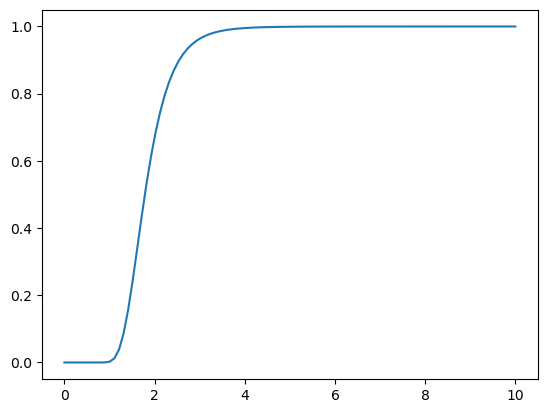

In [12]:
x=np.linspace(0,10,100)
y=[equation(i) for i in x]
plt.plot(x,y)

In [31]:
k=2.8562545776367188
# k=3.3933669328689575
# k=2.7198344469070435
u=5.95
s=3.052
print(u+k*s,u-k*s)

14.667288970947265 -2.7672889709472654


In [21]:
np.exp(2)

7.38905609893065

In [37]:
from scipy.stats import nct
n=10
P=.9
alpha=.05
delta=norm.ppf(P)*(n**.5)
k=nct.ppf(1-alpha,n-1,delta)/(n**.5)
u=5.95
s=3.052
print(u+k*s,u-k*s)

13.13636168234229 -1.2363616823422907


In [2]:
def order_insensitive_hash(numbers):
    return hash((len(numbers), sum(numbers), sum(n**2 for n in numbers)))

numbers = [3, 1, 4, 1, 5, 19]
hash_value = order_insensitive_hash(numbers)
print(f"Order-insensitive hash: {hash_value}")

Order-insensitive hash: 6049592359779828051


In [3]:
def hash_xor(numbers):
    h = 0
    for num in numbers:
        h ^= hash(num)
    return h

numbers = [3, 1, 4, 1, 5, 9]
print(f"XOR Hash: {hash_xor(numbers)}")


XOR Hash: 11


In [4]:
def hash_combined(numbers):
    length = len(numbers)
    sum_nums = sum(numbers)
    sum_squares = sum(n**2 for n in numbers)
    xor_hash = hash_xor(numbers)
    return hash((length, sum_nums, sum_squares, xor_hash))

numbers = [3, 1, 4, 1, 5, 9]
print(f"Combined Hash: {hash_combined(numbers)}")

Combined Hash: -8359928141275670570
